#**2D Linear Gradient**
##Standard Settings
**Particle = $^{199}Hg$**

**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s}$**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Electric field ($E_0$) = $10\,\frac{MV}{m}$**

**Precession time = $1\,s$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

**2D simulations**

**Each point represents the results of 10000 particles ran for both parallel and anti-parallel configurations**

In [18]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20

b_gradient_str = [1.e-10, 1.e-9, 1.e-8]
Omega_range=srkmisc.even_sample_over_log(.1, 10, 100)
legend_titles_b_gradients=[str(x)+' T/m B Gradient' for x in b_gradient_str]
omega_0=(4.84578839927e7*1e-6)
Omega_scale_factor= 0.235*(4.84578839927e7*1e-6)
eta=0.235*omega_0*1e7/(1e-6*299792458*299792458)

##**Diffuse reflection probability = $100\%$**

In [19]:
lines = [range(717, 817),range(817, 917),range(917, 1017)]
axis_range_for_stdev = [ 8e-19, 2e-13,1e-10, 1e-1]

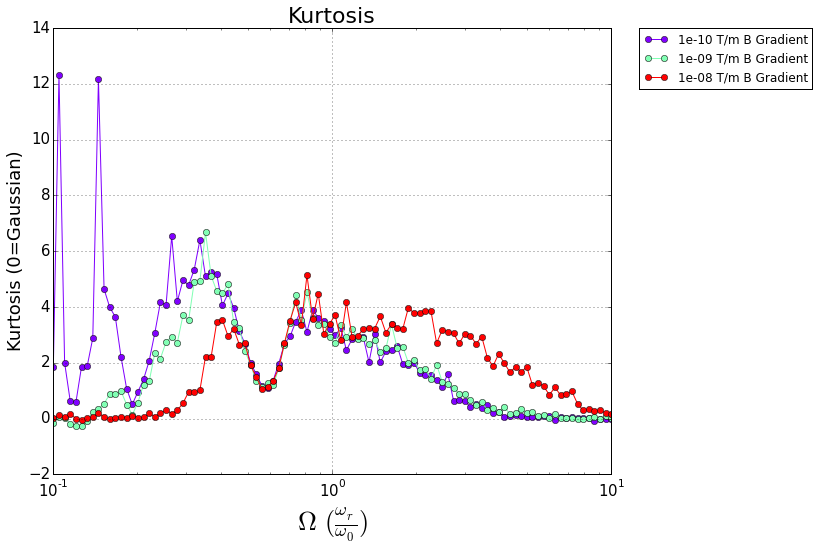

In [20]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

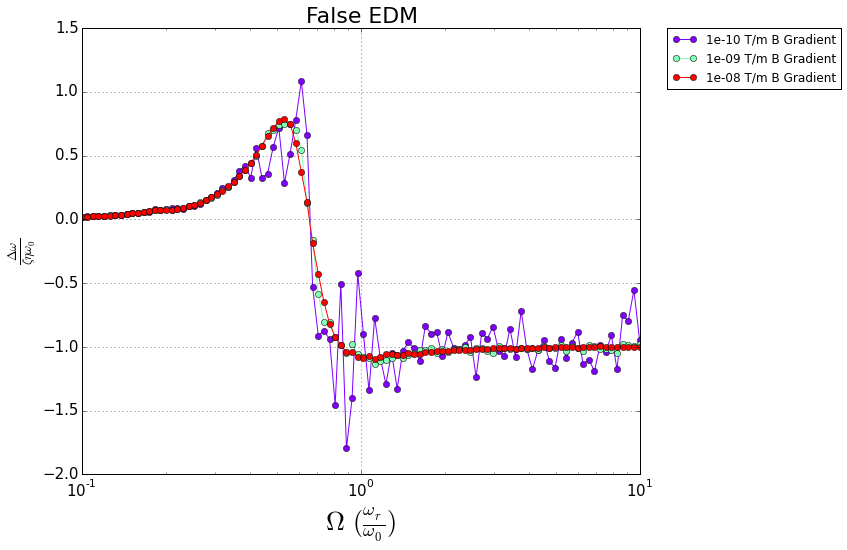

In [21]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=18)
plt.title('False EDM', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##**Diffuse reflection probability = $0\%$ (specular), 2D**

In [25]:
lines = [range(1017, 1117),range(1117, 1217),range(1217, 1317)]
axis_range_for_stdev = [ 8e-19, 2e-13,1e-10, 1e-1]

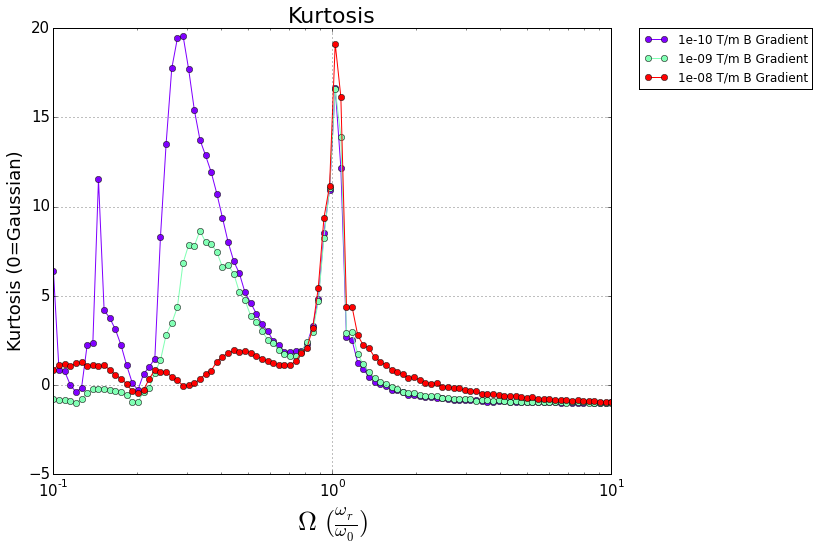

In [26]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 0,2,-2,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

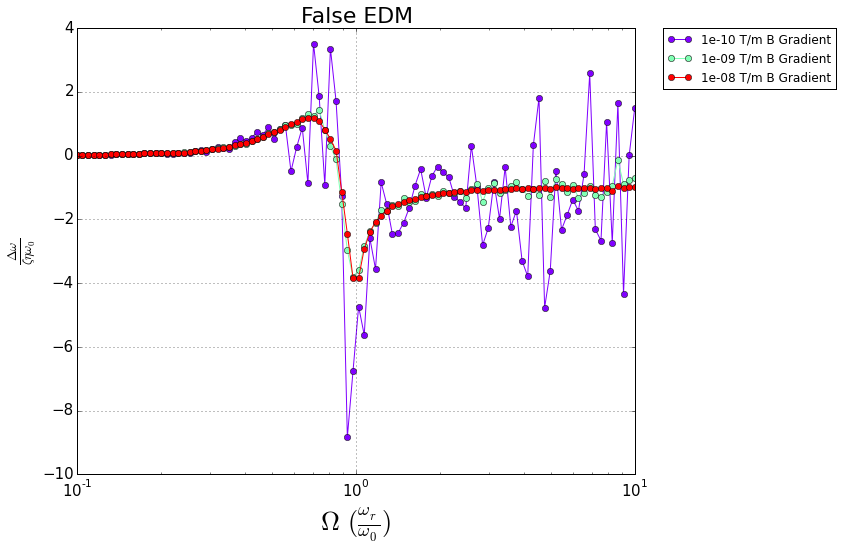

In [24]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=18)
plt.title('False EDM', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##**Diffuse reflection probability = $0\%$ (specular)**, 3D EField 1e6 V/m

In [27]:
lines = [range(2286, 2386),range(2386, 2486),range(2486, 2586)]

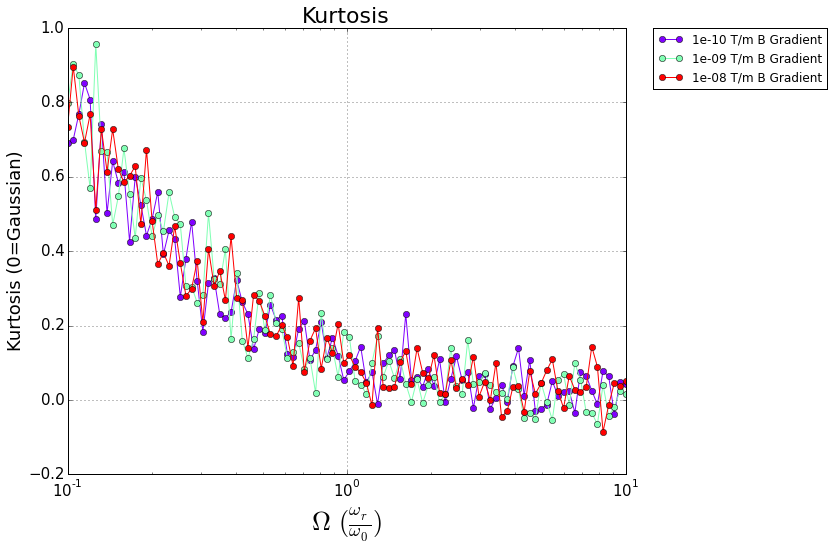

In [28]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 0,2,-2,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

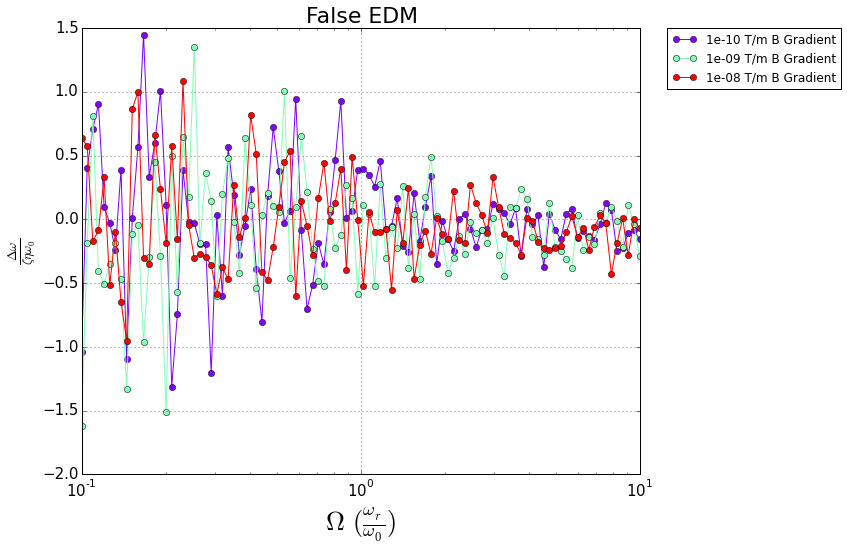

In [29]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=18)
plt.title('False EDM', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

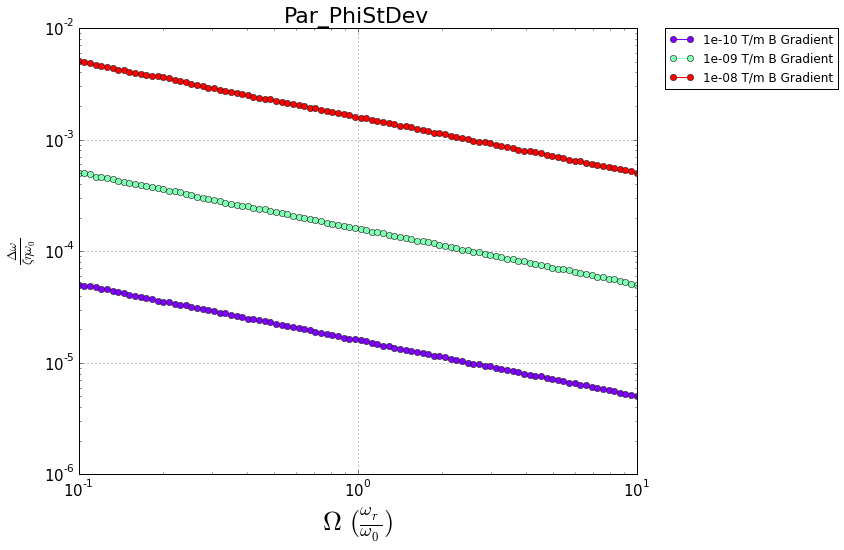

In [33]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=18)
plt.title('Par_PhiStDev', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()